# TITLE: Kurt Kinetic Equation Application
# AUTHOR: Samuel Law

In [1]:
%reset -f

In [2]:
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# create expression for velocity
d, t, s = sm.symbols("d, t, s")
r = d/2        # cylinder radius in km
w = sm.pi*2/t  # cylinder rad/micros
v = w*r        # cylinder km/micros
v

pi*d/t

In [4]:
# create an expression for mph
vals = {d: 054.2e-6  } # km
kmm = v.subs(vals)     # km/micros
kms = kmm*1e6          # km/s
kmh = kms*3600         # km/h
mph = kmh*0.621371     # mi/h
mph

121241.90952*pi/t

In [5]:
# create a function to calculate mph from micros
mph_func = sm.lambdify([t], mph, modules="numpy")
mph_func(1_000_000)

0.38089269225523037

In [6]:
# create a function to calcualte power from mph
power = (5.244820*mph) + (0.019168*mph*mph*mph)
power_func = sm.lambdify([t], power, modules="numpy")
power_func(1_000_000)

1.9987728266565907

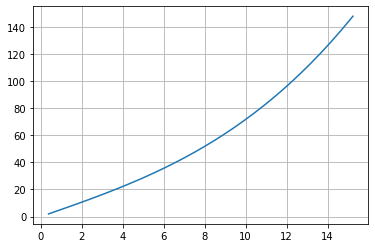

In [7]:
# plot the results using a test dataset
micros = np.linspace(2.5e4, 1e6, 1000)
speeds = [mph_func(m) for m in micros]
powers = [power_func(m) for m in micros]
plt.plot(speeds, powers)
plt.grid();

In [8]:
# create the javascript code
from sympy.printing.jscode import jscode
print(f'mph = {jscode(mph)}')
print(f'watts = {jscode(power)}')

mph = 121241.90952*Math.PI/t
watts = 635891.991888686*Math.PI/t + 34161356213001.9*Math.pow(Math.PI, 3)/Math.pow(t, 3)


# Sources
https://www.kurtkinetic.com/kinetic-power-tech